In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
from pathlib import Path

In [2]:
fs = 48000
num_taps = 512 * 2 + 1

In [12]:
filter_bands = [
    (0, 673.5614939469713),
    (673.5614939469713, 3403.9216896159332),
    (3403.9216896159332, 4751.044677509875),
    (4751.044677509875, 7481.404873178837),
    (7481.404873178837, 8828.52786107278),
    (8828.52786107278, 11558.88805674174),
    (11558.88805674174, 12906.011044635685),
    (12906.011044635685, 23791.337607430454),
]

In [13]:
filter_firs = []

for band in filter_bands:
    low, high = band
    if low == 0:
        fir = signal.firwin(num_taps, high, fs=fs, pass_zero='lowpass') 
    elif high >= fs / 2:
        fir = signal.firwin(num_taps, low, fs=fs, pass_zero='highpass') 
    else:
        fir = signal.firwin(num_taps, [low, high], fs=fs, pass_zero='bandpass') 
    
    filter_firs.append(fir)

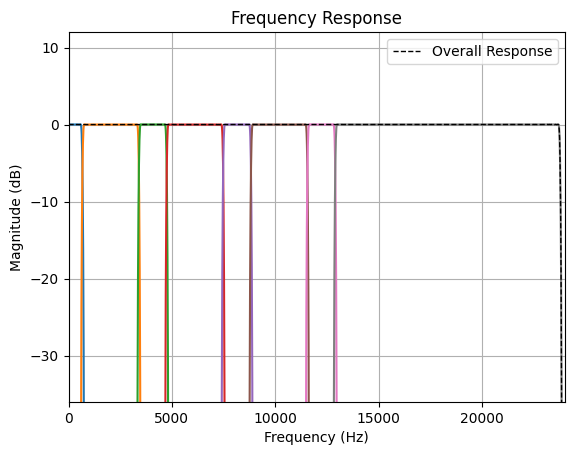

In [14]:
overall_response = None

for i, fir in enumerate(filter_firs):
    w, h = signal.freqz(fir, worN=2000, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h)))
    if overall_response is None:
        overall_response = h
    else:
        overall_response += h

plt.plot(w, 20 * np.log10(np.abs(overall_response) + 1e-10), '--k', linewidth=1, label='Overall Response')
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-36, 12)
plt.xlim(0, 24000)
plt.legend()
plt.grid()
plt.show()

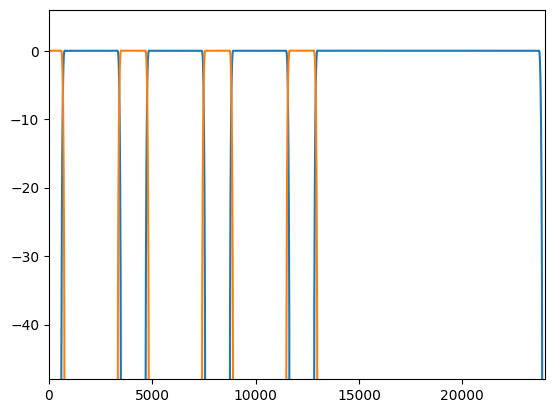

In [15]:
P = filter_firs[1] + filter_firs[3] + filter_firs[5] + filter_firs[7]
C = filter_firs[0] + filter_firs[2] + filter_firs[4] + filter_firs[6]

w, h = signal.freqz(P, worN=2000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))
w, h = signal.freqz(C, worN=2000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylim(-48, 6)
plt.xlim(0, 24000)
plt.show()